In [6]:
# data review
# load tif data
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import torch
import pandas as pd

train_path = "./train"
test_path = "./test"

# load 
def load_tif(path, idx):
    names = os.listdir(path)
    img = cv2.imread(os.path.join(path, names[idx]), cv2.IMREAD_UNCHANGED)
    return img

def show_img(img, title=None):
    plt.imshow(img, cmap='gray')
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

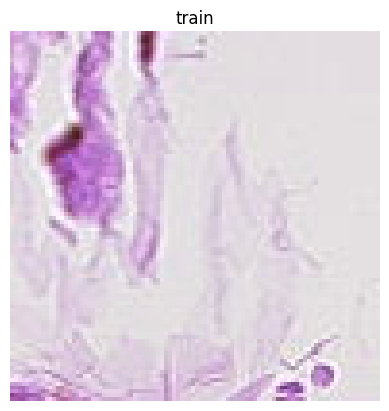

train shape: (96, 96, 3)


In [7]:
show_img(load_tif(train_path, 0), "train")
print("train shape:", load_tif(train_path, 0).shape)

In [8]:
import hiera


/home/khlan/miniconda3/envs/new/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/khlan/miniconda3/envs/new/lib/python3.13/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [9]:
model = torch.hub.load("facebookresearch/hiera", model="hiera_base_224", pretrained=True, checkpoint="mae_in1k_ft_in1k")


Downloading: "https://github.com/facebookresearch/hiera/zipball/main" to /home/khlan/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/hiera/hiera_base_224.pth" to /home/khlan/.cache/torch/hub/checkpoints/hiera_base_224.pth


100%|██████████| 590M/590M [00:26<00:00, 23.6MB/s] 


In [20]:
model.eval()
img = load_tif(train_path, 0)
img = cv2.resize(img, (224, 224))

# inference
with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0).float()
    img = img / 255.0
    print("img shape:", img.shape)
    img = img.permute(0, 3, 1, 2)  # Change to (N, C, H, W)
    print("img shape:", img.shape)
    img = model(img)
    print("img shape:", img.shape)
    

img shape: torch.Size([1, 224, 224, 3])
img shape: torch.Size([1, 3, 224, 224])
img shape: torch.Size([1, 1000])


In [24]:
from predict_head import PredictHead

head = PredictHead(1000, 1)
label = head(img).squeeze(0)
print(f"label {label.item()}")

label 0.0
